In [6]:
import os 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


In [7]:

# Load the dataset
os.chdir('/Users/abdulr/Desktop/Abdul/F20Dl/') # this will be the path to your local directory where the repository is saved
file_path = 'data/df_arabica_clean.csv'  
data = pd.read_csv(file_path)
data.head()


,ID,Country of Origin,Altitude,Region,Number of Bags,Bag Weight,Harvest Year,Grading Date,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Moisture Percentage,Balance,Overall,Total Cup Points (TO BE RECALCULATED),Category One Defects,Category Two Defects
0,0,Colombia,1700-1930,"Piendamo,Cauca",1,35 kg,2021 / 2022,"September 21st, 2022",Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,11.8,8.42,8.58,89.33,0,3
1,1,Taiwan,1200,Chiayi,1,80 kg,2021 / 2022,"November 15th, 2022",Washed / Wet,8.50,8.50,7.92,8.00,7.92,10.5,8.25,8.50,87.58,0,0
2,2,Laos,1300,Laos Borofen Plateau,19,25 kg,2021 / 2022,"November 15th, 2022",Semi Washed,8.33,8.42,8.08,8.17,7.92,10.4,8.17,8.33,87.42,0,2
3,3,Costa Rica,1900,"Los Santos,Tarrazu",1,22 kg,2022,"September 21st, 2022",Washed / Wet,8.08,8.17,8.17,8.25,8.17,11.8,8.08,8.25,87.17,0,0
4,4,Colombia,1850-2100,"Popayan,Cauca",2,24 kg,2022,"March 6th, 2023","Honey,Mossto",8.33,8.33,8.08,8.25,7.92,11.6,7.92,8.25,87.08,0,2


In [14]:
# Select numerical columns for clustering
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance', 'Overall']

# Extract relevant data
X = data[features]
X.head()
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


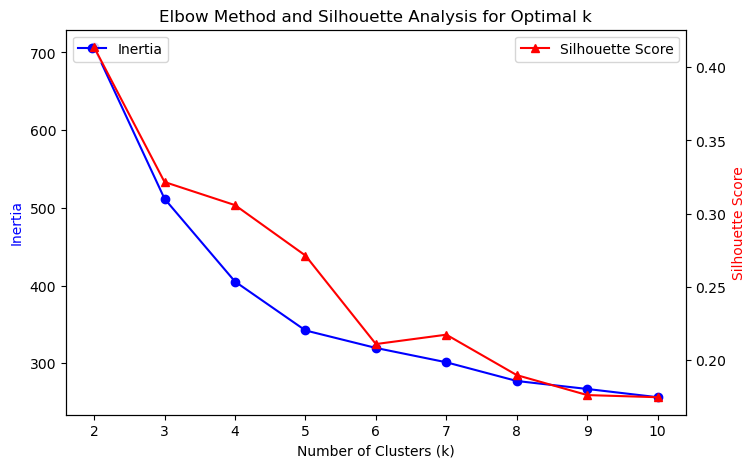

In [30]:
# using Elbow method adn silhouette score to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 11)  # Silhouette score requires at least 2 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve and Silhouette Scores
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.plot(K, inertia, 'bo-', label='Inertia')
ax2.plot(K, silhouette_scores, 'r^-', label='Silhouette Score')

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')
plt.title('Elbow Method and Silhouette Analysis for Optimal k')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()



In [32]:
# Based on the elbow plot, let's choose k = 3 as the optimal number of clusters trying 4 also
# Set the number of clusters for k=3 and k=4
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit the models to the scaled data
kmeans_3.fit(X_scaled)
kmeans_4.fit(X_scaled)

# Get the cluster labels for each k
data['Cluster_k3'] = kmeans_3.labels_
data['Cluster_k4'] = kmeans_4.labels_

# Check the first few rows of the dataframe with both cluster labels
data.head()



,ID,Country of Origin,Altitude,Region,Number of Bags,Bag Weight,Harvest Year,Grading Date,Processing Method,Aroma,...,Acidity,Body,Moisture Percentage,Balance,Overall,Total Cup Points (TO BE RECALCULATED),Category One Defects,Category Two Defects,Cluster_k3,Cluster_k4
0,0,Colombia,1700-1930,"Piendamo,Cauca",1,35 kg,2021 / 2022,"September 21st, 2022",Double Anaerobic Washed,8.58,...,8.58,8.25,11.8,8.42,8.58,89.33,0,3,2,2
1,1,Taiwan,1200,Chiayi,1,80 kg,2021 / 2022,"November 15th, 2022",Washed / Wet,8.50,...,8.00,7.92,10.5,8.25,8.50,87.58,0,0,2,2
2,2,Laos,1300,Laos Borofen Plateau,19,25 kg,2021 / 2022,"November 15th, 2022",Semi Washed,8.33,...,8.17,7.92,10.4,8.17,8.33,87.42,0,2,2,2
3,3,Costa Rica,1900,"Los Santos,Tarrazu",1,22 kg,2022,"September 21st, 2022",Washed / Wet,8.08,...,8.25,8.17,11.8,8.08,8.25,87.17,0,0,2,2
4,4,Colombia,1850-2100,"Popayan,Cauca",2,24 kg,2022,"March 6th, 2023","Honey,Mossto",8.33,...,8.25,7.92,11.6,7.92,8.25,87.08,0,2,2,2


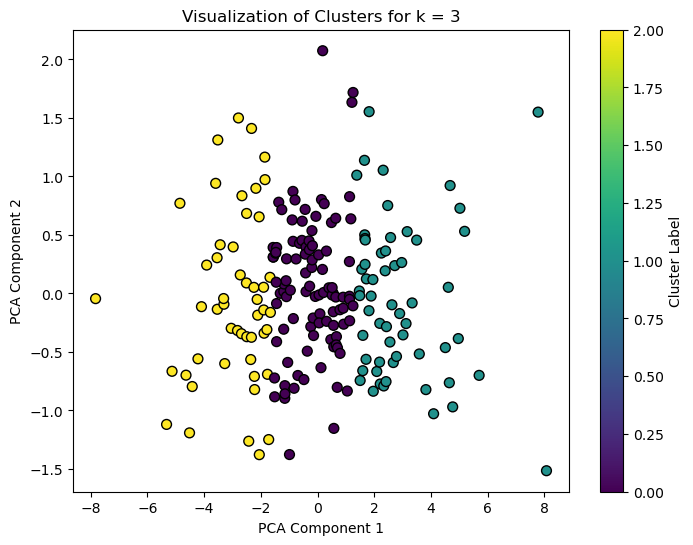

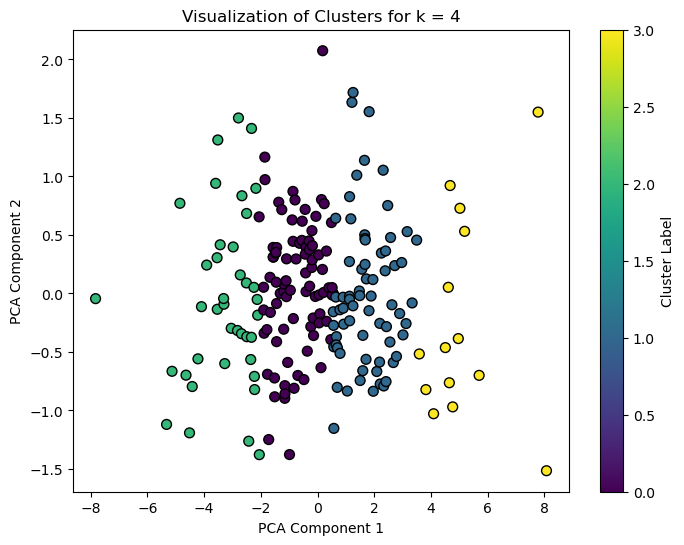

In [34]:
from sklearn.decomposition import PCA

# Function to visualize clusters for a given k
def plot_clusters(k, X_scaled):
    # Fit KMeans with specified number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'Visualization of Clusters for k = {k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Visualize clusters for k = 3
plot_clusters(3, X_scaled)

# Visualize clusters for k = 4
plot_clusters(4, X_scaled)



In [ ]:

# Calculate mean feature values for each cluster
cluster_means = X.groupby('Cluster').mean()
cluster_means
